In [171]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from wordcloud import WordCloud 
from youtube_transcript_api import YouTubeTranscriptApi
from keybert import KeyBERT


In [172]:
# !pip install keybert

In [173]:
from urllib.parse import urlparse, parse_qs
from contextlib import suppress


# noinspection PyTypeChecker
def get_yt_id(url, ignore_playlist=False):
    # Examples:
    # - http://youtu.be/SA2iWivDJiE
    # - http://www.youtube.com/watch?v=_oPAwA_Udwc&feature=feedu
    # - http://www.youtube.com/embed/SA2iWivDJiE
    # - http://www.youtube.com/v/SA2iWivDJiE?version=3&amp;hl=en_US
    query = urlparse(url)
    if query.hostname == 'youtu.be': return query.path[1:]
    if query.hostname in {'www.youtube.com', 'youtube.com', 'music.youtube.com'}:
        if not ignore_playlist:
        # use case: get playlist id not current video in playlist
            with suppress(KeyError):
                return parse_qs(query.query)['list'][0]
        if query.path == '/watch': return parse_qs(query.query)['v'][0]
        if query.path[:7] == '/watch/': return query.path.split('/')[1]
        if query.path[:7] == '/embed/': return query.path.split('/')[2]
        if query.path[:3] == '/v/': return query.path.split('/')[2]
   # returns None for invalid YouTube url


In [174]:
def get_category(data):
    # category = []
    # for i in range(len(data)):
    # if (pd.isna(data['Topic 1'])==False):
    #     if (pd.isna(data['Sub-topic 1-1'])==False):
    #         if (pd.isna(data['Sub-topic 1-2'])==False):
    #             if (pd.isna(data['Sub-topic 1-3'])==False):
    #                 category = 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-1'])+ ','+ 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-2'])+ ','+ 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-3'])
    #             else:
    #                 category = 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-1'])+ ','+ 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-2'])
    #         else:
    #             category = 'Topics'+'->'+str(data['Topic 1'])+ '-> '+str(data['Sub-topic 1-1'])
    #     else:
    #         category = 'Topics'+'->'+str(data['Topic 1'])

    # if (pd.isna(data['Topic 2'])==False):
    #     if (pd.isna(data['Sub-topic 2-1'])==False):
    #         if (pd.isna(data['Sub-topic 2-2'])==False):
    #             if (pd.isna(data['Sub-topic 2-3'])==False):
    #                 category = str(category)+ ','+'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-1'])+ ','+ 'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-2'])+ ','+ 'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-3'])
    #             else:
    #                 category = str(category)+ ','+'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-1'])+ ','+ 'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-2'])
    #         else:
    #             category = str(category)+ ','+'Topics'+'->'+str(data['Topic 2'])+ '-> '+str(data['Sub-topic 2-1'])
    #     else:
    category = str(data['Event'])+ ' '+str(data['Year']) + ',' + str(data['Category']) + ',' + 'Topics'+'->'+str(data['Category'])

    category = str(category)+ ',Workshops and Conferences'+'->'+str(data['Event'])+ ' '+str(data['Year'])
    # if (data['Topic 3']!='Nan'):
    #     if (data['Sub-topic 3-1']!='Nan'):
    #         if (data['Sub-topic 3-2']!='Nan'):
    #             if (data['Sub-topic 3-3']!='Nan'):
    #                 category.append('Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-1'])+ ','+ 'Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-2'])+ ','+ 'Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-3']))
    #             else:
    #                 category.append('Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-1'])+ ','+ 'Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-2']))
    #         else:
    #             category.append('Topics'+'->'+str(data['Topic 3'])+ '-> '+str(data['Sub-topic 3-1']))

    return category

In [175]:
def get_transcript(video_id):
    # get transcript from youtube
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id, cookies='cookies_nice.txt')   
    except OSError:
        transcript = '-'
    
    # transcript = YouTubeTranscriptApi.get_transcript(video_id, cookies='C:/User/nikhil.garg/work/NEUROPAC/cookies.txt')
    return transcript

In [273]:
# from sentence_transformers import SentenceTransformer

# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# kw_model = KeyBERT(model=sentence_model)

kw_model = KeyBERT()


def get_keywords(transcript,stop_words):
    # get keywords from transcript
    keywords_selected=[]
    try:    
        # keywords = kw_model.extract_keywords(transcript, keyphrase_ngram_range=(1, 1), stop_words=stop_words,use_maxsum=True, nr_candidates=10, top_n=5)
        keywords = kw_model.extract_keywords(transcript, keyphrase_ngram_range=(1, 1)) #stop_words=stop_words)
    except OSError:
        keywords = '-'

    for i in range(len(keywords)):
        if(keywords[i][1]>0.3):
            keywords_selected.append(keywords[i][0])

    # try:    
    #     keywords = kw_model.extract_keywords(transcript, keyphrase_ngram_range=(1, 2), stop_words=stop_words,use_maxsum=True, nr_candidates=20, top_n=5)
    #     # keywords = kw_model.extract_keywords(transcript, keyphrase_ngram_range=(1, 2), stop_words=stop_words)
    # except OSError:
    #     keywords = '-'

    # for i in range(len(keywords)):
    #     if(keywords[i][1]>0.5):
    #         keywords_selected.append(keywords[i][0])


    return keywords_selected

In [274]:
import warnings
warnings.filterwarnings("ignore")

In [288]:
df = pd.DataFrame()
file_names = [ 'SNUFA.csv']
stop_words_origin=['neuromorphic','transcript','computing','neural','spiking','workshop','panda','python','function','discussing','priya','titan','researcher','youtube','biological','artificial' ]
for file_name in file_names:
    # file_name = 'NICE.csv'
    data = pd.read_csv(file_name) 
    thumbnail=['thumbnail']
    title=['title']
    tags = ['tags']
    category=['category']
    # transcript=['transcript']
    keywords=['keywords']
    for i in range(len(data)-1):
        # print(i)
        id = get_yt_id(data['link'][i]) 
        # print(id)
        stop_words_video = stop_words_origin.copy()
        stop_words_video.append(str(data['Speaker'][i]).lower())
        thumbnail_link = 'https://i.ytimg.com/vi/' + str(id) + '/default.jpg'
        thumbnail.append(thumbnail_link)


        # keywords_video = get_keywords(data['Transcript'][i],stop_words_video)
        keywords_video = get_keywords(data['About'][i],stop_words_video)


        print(keywords_video)
        keywords.append(keywords_video)
        
        
        video_title = str(data['Speaker'][i])+' | ' +str(data['Year'][i]) +' | '+str(data['About'][i])
        title.append(video_title)
        video_tag=str(data['Organization'][i])+','+str(data['Event'][i])+ ',' +str(data['Speaker'][i]) 
        # video_tag.append(keywords_video)

        video_tag = video_tag + ','+','.join(keywords_video)

        tags.append(video_tag)

        
        video_category = get_category(data.iloc[i])
        # video_category='Workshops and Conferences'+'->'+str(data['Event'][i])+ ' '+str(data['Year'][i]) + get_category(data.iloc[i])
        category.append(video_category)

    data['thumbnail'] = thumbnail
    data['title'] = title
    data['tags'] = tags
    data['Category'] = category
    # data['Transcript'] = transcript
    data['Keywords'] = keywords
    filename_processed = file_name + '_processed.csv'
    data.to_csv(filename_processed, index=False)
    data

['spiking', 'neural']
['snns', 'memory', 'hebbian', 'learning', 'plasticity']
['snns', 'convex', 'concave']
['synaptic', 'behavioral', 'credit', 'plasticity', 'btsp']
['spiking', 'neural', 'dynamic', 'forward', 'propagation']
['neuromorphic', 'spiking', 'computing', 'networks']
['dendrites', 'biological', 'artificial', 'circuits']
['neuromorphic', 'nns', 'intelligence', 'bio']
['learning', 'snns', 'model', 'plasticity']
['cortical', 'circuits', 'models', 'artificial']
['spiking', 'synapses', 'nonlinear', 'computations', 'neural']
['spiking', 'spikingjelly', 'learning']
['spiking', 'unsupervised', 'neural', 'networks']
['embeddings', 'spike', 'graph', 'relational']
['spiking', 'neural', 'stereospike', 'depth', 'learning']
['spiking', 'interneuron', 'circuits', 'compartment']
['spiking', 'dendritic', 'neural', 'representation', 'learning']
['heterogeneity', 'neural', 'learning', 'understanding']
['neuromorphic', 'snns', 'hardware', 'learning']
['spiking', 'initialization', 'neural', 'opt

'spiking,neural'

In [289]:
data['tags'][1]

'Yale,SNUFA Workshop,Priya Pandaspiking,neural'

In [ ]:
!ping youtube.com

'ping6' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:



data['Transcript']
    

0                                                      -
1                                                      -
2                                                      -
3                                                      -
4                                                      -
                             ...                        
103                                                    -
104                                                    -
105                                                    -
106    [{'text': '[Music]', 'start': 0.84, 'duration'...
107    [{'text': '[Music]', 'start': 0.84, 'duration'...
Name: Transcript, Length: 108, dtype: object

In [ ]:
get_category(data.iloc[0])

'[],Topics->Neuromorphic-compatible algorithms,Workshops and Conferences->NICE 2022'

In [ ]:
data['About '].unique().shape

(325,)

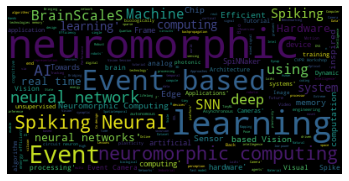

In [ ]:
text = data['About '].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

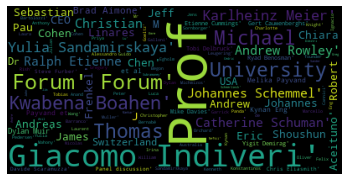

In [ ]:
text = data['Speaker'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

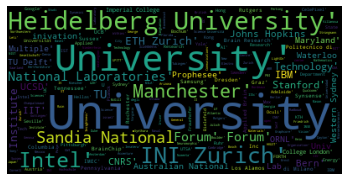

In [ ]:
text = data['Organization'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()